In [2]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 107.3 kB/s eta 0:00:0000:0100:04
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 121.3 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 108.2 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 112.5 kB/s eta 0:00:00a 0:00:03
Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [3]:
!pip install seaborn

Text(0, 1.55, 'DANGER ZONE')

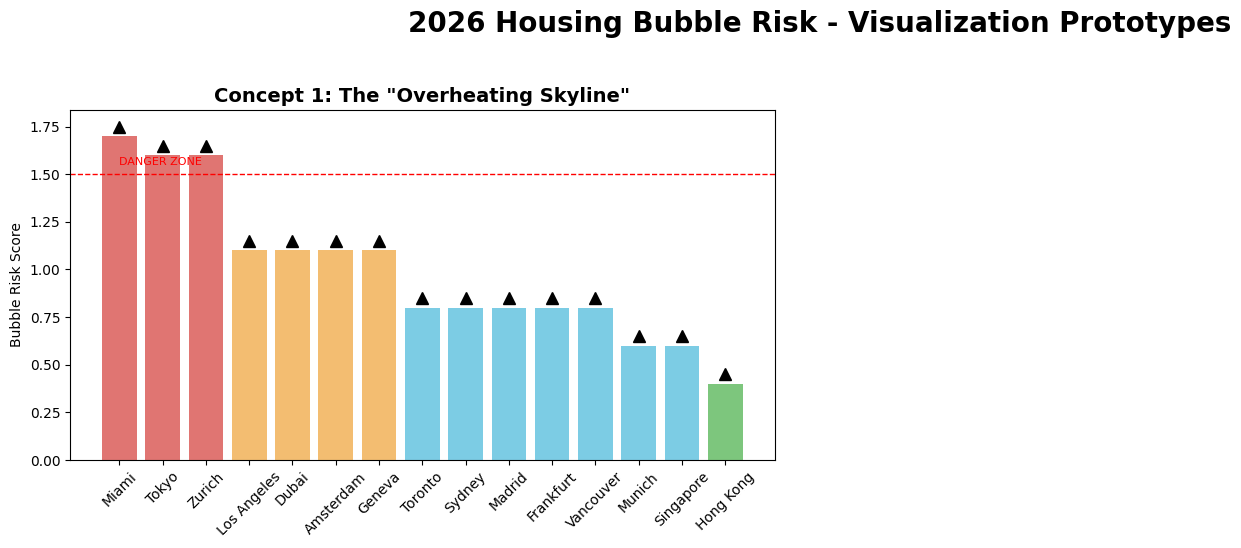

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. DATA PREPARATION
# Recreating the dataset from your image
data = {
    "Rank": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    "City": [
        "Miami",
        "Tokyo",
        "Zurich",
        "Los Angeles",
        "Dubai",
        "Amsterdam",
        "Geneva",
        "Toronto",
        "Sydney",
        "Madrid",
        "Frankfurt",
        "Vancouver",
        "Munich",
        "Singapore",
        "Hong Kong",
    ],
    "Category": [
        "High",
        "High",
        "High",
        "Elevated",
        "Elevated",
        "Elevated",
        "Elevated",
        "Moderate",
        "Moderate",
        "Moderate",
        "Moderate",
        "Moderate",
        "Moderate",
        "Moderate",
        "Low",
    ],
    "Score": [
        1.70,
        1.60,
        1.60,
        1.10,
        1.10,
        1.10,
        1.10,
        0.80,
        0.80,
        0.80,
        0.80,
        0.80,
        0.60,
        0.60,
        0.40,
    ],
}
df = pd.DataFrame(data)

# Define a color palette for the risk categories
risk_colors = {
    "High": "#d9534f",
    "Elevated": "#f0ad4e",
    "Moderate": "#5bc0de",
    "Low": "#5cb85c",
}
df["Color"] = df["Category"].map(risk_colors)

# Initialize the figure canvas (One large dashboard sketch)
fig = plt.figure(figsize=(20, 10))
fig.suptitle(
    "2026 Housing Bubble Risk - Visualization Prototypes", fontsize=20, weight="bold"
)

# ---------------------------------------------------------
# PROTOTYPE 1: THE "OVERHEATING SKYLINE" (Top Left)
# ---------------------------------------------------------
ax1 = fig.add_subplot(2, 2, 1)

# The Bar Chart (Buildings)
bars = ax1.bar(df["City"], df["Score"], color=df["Color"], alpha=0.8)

# The Creative Twist: Adding "Roofs" (Triangles) on top
for bar, score in zip(bars, df["Score"]):
    ax1.plot(
        bar.get_x() + bar.get_width() / 2,
        score + 0.05,
        marker="^",
        color="black",
        markersize=8,
    )

ax1.set_title('Concept 1: The "Overheating Skyline"', fontsize=14, weight="bold")
ax1.set_ylabel("Bubble Risk Score")
ax1.tick_params(axis="x", rotation=45)
ax1.axhline(y=1.5, color="red", linestyle="--", linewidth=1, label="Risk Threshold")
ax1.text(0, 1.55, "DANGER ZONE", color="red", fontsize=8)

In [5]:
# ---------------------------------------------------------
# PROTOTYPE 2: THE "FLOATING BUBBLES" (Top Right)
# ---------------------------------------------------------
ax2 = fig.add_subplot(2, 2, 2)

# Scatter Plot with Size variation
# We use 'Rank' for X-axis to distribute them, but hide the labels to make it look abstract
scatter = ax2.scatter(
    x=df["Rank"],
    y=df["Score"],
    s=df["Score"] * 300,  # Size bubbles by Score
    c=df["Color"],
    alpha=0.7,
    edgecolors="black",
)

# Annotate the top bubble
ax2.text(1, 1.75, "Miami\n(Pop!)", horizontalalignment="center", weight="bold")

ax2.set_title('Concept 2: The "Floating Bubbles"', fontsize=14, weight="bold")
ax2.set_ylabel("Risk Magnitude")
ax2.set_xlabel("Global Rank")
ax2.axhline(y=1.5, color="gray", linestyle=":", label="Risk Line")
ax2.grid(True, linestyle="--", alpha=0.3)

In [6]:
# ---------------------------------------------------------
# PROTOTYPE 3: THE "RISK RADAR" (Bottom Center)
# ---------------------------------------------------------
# Polar plots require a specific projection
ax3 = fig.add_subplot(2, 1, 2, projection="polar")

# Setup angles
N = len(df)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = np.pi / N

# The bars need to be sorted for the spiral effect (already sorted by Rank)
bars_polar = ax3.bar(
    theta, df["Score"], width=width, bottom=0.0, color=df["Color"], alpha=0.8
)

# Add Labels
ax3.set_xticks(theta)
ax3.set_xticklabels(df["City"])
ax3.set_title(
    'Concept 3: The "Risk Radar" (Cyberpunk Style)', fontsize=14, weight="bold", pad=20
)

# Remove radial grid for cleaner look
ax3.set_yticklabels([])
ax3.grid(False)

# Make background dark for this specific chart to show the "Radar" feel
ax3.set_facecolor("#222222")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>